In [0]:
'''
hypoplastic model Wu(1992)
by Dr. Sompote Youwai
KMUTT 2020
'''
import numpy as np
from sympy import *
from sympy.solvers import solve
import pandas as pd
import matplotlib.pyplot as plt

from numpy import array #add symbol to system from sympy
T1, T2, T3 = symbols('T1 T2 T3')
D1, D2, D3 = symbols('D1 D2 D3')
dT1, dT2, dT3 = symbols('dT1 dT2 dT3')
C1, C2, C3, C4 = symbols('C1 C2 C3 C4')


 Define Model

In [0]:
T = array([[T1,0,0],[0,T2,0],[0,0,T2]]) #form tensor from array 
D = array([[D1,0,0],[0,D2,0],[0,0,D2]])
dT= array([[dT1,0,0],[0,dT2,0],[0,0,dT2]])
trT= T1+T2+T2
trD=D1+D2+D2
trD2=(D1**2)+(2*(D2**2))
trTD =T1*D1+T2*D2+T2*D2
Tstr=T-trT/3*array([[1,0,0],[0,1,0],[0,0,1]])
#Hypoplastic Equation
Eq=C1*trT*D+C2*trTD/trT*T+C3*T**2*sqrt(trD2)/trT+C4*(Tstr**2)*sqrt(trD2)/trT
### get value from array
axeqq1=Eq[0,0]
axeqq2=Eq[1,1]


Forward integration of hypoplastic model

In [0]:
#model parameter
C1p=-50
C2p=-1352
C3p=-316
C4p=-1868
#
T1c=-100
T2c=-100
E1=0.
E2=0.
Ev=0.
D2c=0.
Evc=0.
dT1c=0.
#subtract model parameter
soldT1=axeqq1.subs({C1:C1p, C2:C2p, C3:C3p, C4:C4p, D3:D2}) #dT1 add value 
soldT2=axeqq2.subs({C1:C1p, C2:C2p, C3:C3p, C4:C4p, D3:D2}) #dT2 add value

#sol1=soldT2.subs({T1:T1c, T2:T2c, D1:D1c})
#print(sol1)

#forward integration
df = pd.DataFrame(columns=['T1', 'T2','DT1', 'D1', 'D2', 'E1', 'E2', 'Ev'])
D1c=-0.001 #strain increment
laststrain=-0.1 #maximum strain
while E1 > laststrain:
    df = df.append({'T1': -T1c, 'T2':-T2c,'DT1': dT1c,'D1': D1c , 'D2': D2c, \
                    'E1':-100*E1 ,'E2':-100*E2, 'Ev':-100*Evc},\
                   ignore_index=True) #add Data to list
    E1=E1+D1c #vertical strain
    sol1=soldT2.subs({T1:T1c, T2:T2c, D1:D1c})
    D2c=solve(sol1,D2)[0] #Solve D2 from dT2 =0 in triaxial test
    E2=E2+D2c
    dT1c=soldT1.subs({T1:T1c,T2:T2c, D1:D1c,D2:D2c}) #calculate dT1
    T1c=T1c+dT1c #T1
    Evc=E1+2*E2 #Volumetric strain    


<function matplotlib.pyplot.show>

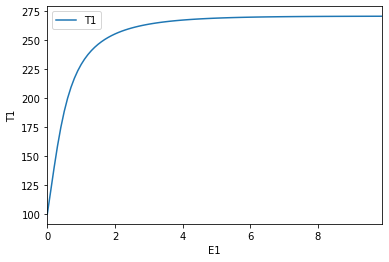

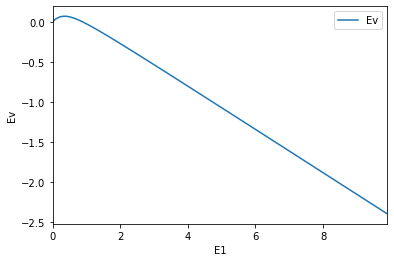

In [25]:
#Plotting
df=df.astype(float)
df.plot(x ='E1', y='T1', kind = 'line')
plt.ylabel('T1')	
plt.show
df.plot(x ='E1', y='Ev', kind = 'line')	
plt.ylabel('Ev')
plt.show

In [0]:
#writing excel file
df.to_excel("output.xlsx") 